In [2]:
import torch
import pandas as pd
import numpy as np
from torch import nn
import os
import sklearn
import matplotlib.pyplot as plt
import sys

In [3]:
path = "/Users/jm/VS Code/ML/Time Series Prediction/N_TXT"

os.chdir(path)

fx_data = np.array([], dtype=np.float32)

#gets data from file specified by file_path
def get_contents(file_path):
    global fx_data
    skip_lines = 7

    with open(file_path,'r') as file:

        for skips in range(skip_lines):
            next(file)

        lines = file.readlines()[:-1]

        for line in lines:
            data = line.split()[-1]
            fx_data = np.append(fx_data, np.float32(data))
            #print(data)

In [4]:
#go through all files in directory and extract data from txt files
for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{path}/{file}"
        print(f"Currently working on: {file_path}")
        get_contents(file_path)

fx_data.dtype

Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/9Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/8Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/1Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/3Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/10Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/2Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/11Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/7Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/6Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/4Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/5Npie.txt


dtype('float32')

In [5]:
#create time "sample" for dataframe
time_data = np.array([], dtype=np.float32)

for x in range(len(fx_data)):
    time_data = np.append(time_data, np.float32(x))
    type(x)

time_data, time_data[0].dtype

(array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 1.87857e+05,
        1.87858e+05, 1.87859e+05], dtype=float32),
 dtype('float32'))

In [6]:
#create time "sample" for dataframe
dataset = pd.DataFrame({"Time": time_data,
                        "FX Channel": fx_data})
dataset

,Time,FX Channel
0,0.0,-0.6
1,1.0,-0.6
2,2.0,-0.6
3,3.0,-0.6
4,4.0,-0.6
...,...,...
187855,187855.0,4.1
187856,187856.0,4.1
187857,187857.0,4.1
187858,187858.0,4.1


([<matplotlib.lines.Line2D at 0x3292c10f0>], pandas.core.frame.DataFrame)

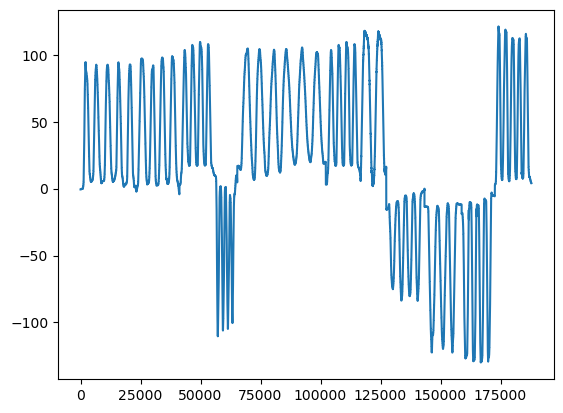

In [7]:
plt.plot(dataset["Time"], dataset["FX Channel"]), type(dataset)

In [8]:
from copy import deepcopy as dc

def lstm_dataframe(df, n_steps):
    df = dc(df)
    
    df.set_index("FX Channel")

    for i in range(1, n_steps+1):
        df[f'Time(t-{i})'] = df['Time'].shift(i)
        
    df.dropna(inplace=True)
    
    return df

n_steps = 7
shifted_df = lstm_dataframe(dataset, n_steps)

shifted_df, shifted_df.shape

(            Time  FX Channel  Time(t-1)  Time(t-2)  Time(t-3)  Time(t-4)  \
 7            7.0        -0.6        6.0        5.0        4.0        3.0   
 8            8.0        -0.6        7.0        6.0        5.0        4.0   
 9            9.0        -0.6        8.0        7.0        6.0        5.0   
 10          10.0        -0.6        9.0        8.0        7.0        6.0   
 11          11.0        -0.6       10.0        9.0        8.0        7.0   
 ...          ...         ...        ...        ...        ...        ...   
 187855  187855.0         4.1   187854.0   187853.0   187852.0   187851.0   
 187856  187856.0         4.1   187855.0   187854.0   187853.0   187852.0   
 187857  187857.0         4.1   187856.0   187855.0   187854.0   187853.0   
 187858  187858.0         4.1   187857.0   187856.0   187855.0   187854.0   
 187859  187859.0         4.1   187858.0   187857.0   187856.0   187855.0   
 
         Time(t-5)  Time(t-6)  Time(t-7)  
 7             2.0        1.0  

In [9]:
columnsTitles = ['FX Channel', 'Time', 'Time(t-1)', "Time(t-2)", "Time(t-3)", "Time(t-4)", 
                "Time(t-5)", "Time(t-6)", "Time(t-7)"]

shifted_df = shifted_df.reindex(columns=columnsTitles)

shifted_df

,FX Channel,Time,Time(t-1),Time(t-2),Time(t-3),Time(t-4),Time(t-5),Time(t-6),Time(t-7)
7,-0.6,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0
8,-0.6,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0
9,-0.6,9.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0
10,-0.6,10.0,9.0,8.0,7.0,6.0,5.0,4.0,3.0
11,-0.6,11.0,10.0,9.0,8.0,7.0,6.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...
187855,4.1,187855.0,187854.0,187853.0,187852.0,187851.0,187850.0,187849.0,187848.0
187856,4.1,187856.0,187855.0,187854.0,187853.0,187852.0,187851.0,187850.0,187849.0
187857,4.1,187857.0,187856.0,187855.0,187854.0,187853.0,187852.0,187851.0,187850.0
187858,4.1,187858.0,187857.0,187856.0,187855.0,187854.0,187853.0,187852.0,187851.0


In [10]:
dataset = shifted_df.to_numpy()

dataset.shape, dataset

((187853, 9),
 array([[-6.00000e-01,  7.00000e+00,  6.00000e+00, ...,  2.00000e+00,
          1.00000e+00,  0.00000e+00],
        [-6.00000e-01,  8.00000e+00,  7.00000e+00, ...,  3.00000e+00,
          2.00000e+00,  1.00000e+00],
        [-6.00000e-01,  9.00000e+00,  8.00000e+00, ...,  4.00000e+00,
          3.00000e+00,  2.00000e+00],
        ...,
        [ 4.10000e+00,  1.87857e+05,  1.87856e+05, ...,  1.87852e+05,
          1.87851e+05,  1.87850e+05],
        [ 4.10000e+00,  1.87858e+05,  1.87857e+05, ...,  1.87853e+05,
          1.87852e+05,  1.87851e+05],
        [ 4.10000e+00,  1.87859e+05,  1.87858e+05, ...,  1.87854e+05,
          1.87853e+05,  1.87852e+05]], dtype=float32))

In [11]:
X = dataset[:, 1:]
y = dataset[:, 0]

X.shape, y.shape, y[0], X[0]

((187853, 8),
 (187853,),
 -0.6,
 array([7., 6., 5., 4., 3., 2., 1., 0.], dtype=float32))

In [12]:
X = dc(np.flip(X, axis=1))
X

array([[0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 5.00000e+00,
        6.00000e+00, 7.00000e+00],
       [1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 6.00000e+00,
        7.00000e+00, 8.00000e+00],
       [2.00000e+00, 3.00000e+00, 4.00000e+00, ..., 7.00000e+00,
        8.00000e+00, 9.00000e+00],
       ...,
       [1.87850e+05, 1.87851e+05, 1.87852e+05, ..., 1.87855e+05,
        1.87856e+05, 1.87857e+05],
       [1.87851e+05, 1.87852e+05, 1.87853e+05, ..., 1.87856e+05,
        1.87857e+05, 1.87858e+05],
       [1.87852e+05, 1.87853e+05, 1.87854e+05, ..., 1.87857e+05,
        1.87858e+05, 1.87859e+05]], dtype=float32)

In [13]:
#trying to split data loader now? not too sure if this is the best way
split_idx = int(0.8 * len(dataset))

X_train = X[:split_idx]
X_test = X[split_idx:]

y_train = y[:split_idx]
y_test = y[split_idx:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150282, 8), (37571, 8), (150282,), (37571,))

In [14]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([150282, 8]),
 torch.Size([37571, 8]),
 torch.Size([150282]),
 torch.Size([37571]))

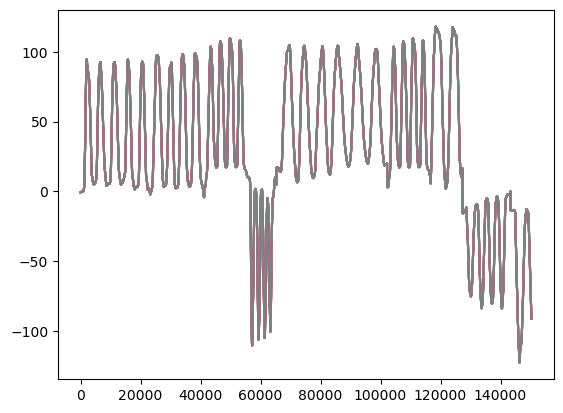

In [15]:
plt.plot(X_train, y_train)

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

y_train = scaler.fit_transform(y_train.reshape(-1, 1))
y_test = scaler.fit_transform(y_test.reshape(-1, 1))

X_train.shape, y_train.shape

((150282, 8), (150282, 1))

In [17]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([150282, 8]),
 torch.Size([37571, 8]),
 torch.Size([150282, 1]),
 torch.Size([37571, 1]))

In [18]:
type(X_train)

torch.Tensor

In [19]:
X_train = X_train.unsqueeze(dim = 2)
X_test = X_test.unsqueeze(dim = 2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([150282, 8, 1]),
 torch.Size([37571, 8, 1]),
 torch.Size([150282, 1]),
 torch.Size([37571, 1]))

In [20]:
#set device
device = "cuda" if torch.cuda.is_available() else "cpu"

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([150282, 8, 1]),
 torch.Size([37571, 8, 1]),
 torch.Size([150282, 1]),
 torch.Size([37571, 1]))

In [22]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [23]:
from torch.utils.data import DataLoader

#setup batch size hyperparameter
BATCH_SIZE = 16

#turn datasets into iterables (batches)
train_loader = DataLoader(dataset=train_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=False)

#check out what we've created
# print(f"Dataloaders: {train_dataloader, test_dataloader}")
# print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
# print(f"Length of train_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

In [24]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 8, 1]) torch.Size([16, 1])


In [25]:
#set manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [27]:
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        """The __init__ method that initiates an RNN instance.

        Args:
            input_dim (int): The number of nodes in the input layer
            hidden_dim (int): The number of nodes in each layer
            layer_dim (int): The number of layers in the network
            output_dim (int): The number of nodes in the output layer
            dropout_prob (float): The probability of nodes being dropped out

        """
        super(RNNModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # RNN layers
        self.rnn = nn.RNN(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """The forward method takes input tensor x and does forward propagation

        Args:
            x (torch.Tensor): The input tensor of the shape (batch size, sequence length, input_dim)

        Returns:
            torch.Tensor: The output tensor of the shape (batch size, output_dim)

        """
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim,device=x.device).requires_grad_()

        # Forward propagation by passing in the input and hidden state into the model
        out, h0 = self.rnn(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)
        return out
    
model = RNNModel(input_dim=1,
                 hidden_dim=1, 
                 layer_dim=8,
                 output_dim=1,
                 dropout_prob=0.1)

In [28]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [29]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [30]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.188
Batch 200, Loss: 0.192
Batch 300, Loss: 0.178
Batch 400, Loss: 0.198
Batch 500, Loss: 0.183
Batch 600, Loss: 0.173
Batch 700, Loss: 0.186
Batch 800, Loss: 0.181
Batch 900, Loss: 0.198
Batch 1000, Loss: 0.200
Batch 1100, Loss: 0.191
Batch 1200, Loss: 0.187
Batch 1300, Loss: 0.177
Batch 1400, Loss: 0.184
Batch 1500, Loss: 0.180
Batch 1600, Loss: 0.175
Batch 1700, Loss: 0.179
Batch 1800, Loss: 0.193
Batch 1900, Loss: 0.175
Batch 2000, Loss: 0.187
Batch 2100, Loss: 0.185
Batch 2200, Loss: 0.188
Batch 2300, Loss: 0.170
Batch 2400, Loss: 0.186
Batch 2500, Loss: 0.176
Batch 2600, Loss: 0.167
Batch 2700, Loss: 0.168
Batch 2800, Loss: 0.158
Batch 2900, Loss: 0.158
Batch 3000, Loss: 0.159
Batch 3100, Loss: 0.154
Batch 3200, Loss: 0.155
Batch 3300, Loss: 0.146
Batch 3400, Loss: 0.155
Batch 3500, Loss: 0.147
Batch 3600, Loss: 0.151
Batch 3700, Loss: 0.150
Batch 3800, Loss: 0.153
Batch 3900, Loss: 0.148
Batch 4000, Loss: 0.143
Batch 4100, Loss: 0.161
Batch 4200, Loss

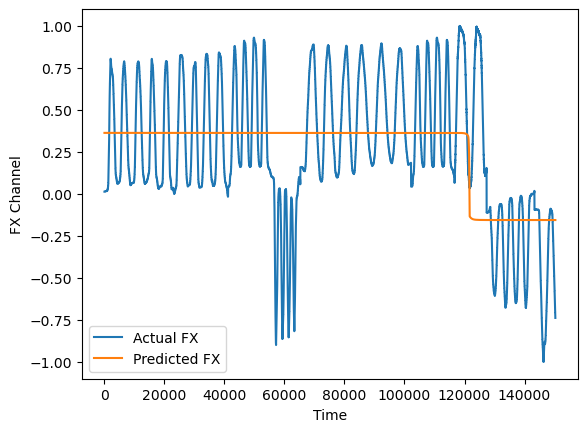

In [31]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual FX')
plt.plot(predicted, label='Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()


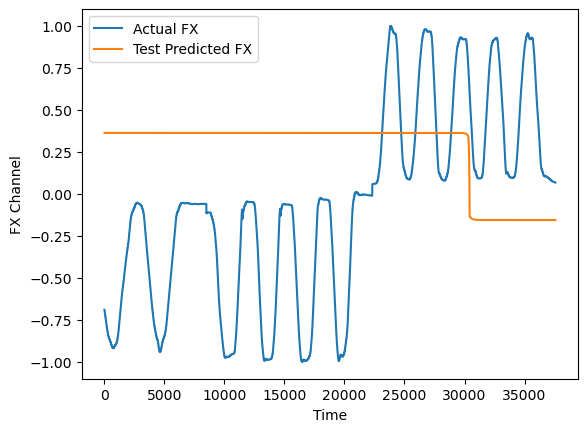

In [32]:
model.eval()
with torch.inference_mode():
    test_pred = model(X_test.to(device)).to('cpu').numpy()

plt.plot(y_test, label='Actual FX')
plt.plot(test_pred, label='Test Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()